<a href="https://colab.research.google.com/github/Tariqul057/ML-475/blob/Lab-Works/Lab_07(BERT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

Data source: https://data.mendeley.com/datasets/8fbdhh72gs/5

In [ ]:
!pip install --upgrade pip


!pip install -q transformers==4.30.0
!pip install -q  tensorflow==2.12.0

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 138.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 119.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.15 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.12.0


# Load Dataset


In [ ]:
!gdown --id 1VEanmIImFMEkqt_4S9RuEdpUqQYMZaro

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VEanmIImFMEkqt_4S9RuEdpUqQYMZaro
To: /content/balanced_emotion_subset.csv
100% 12.0k/12.0k [00:00<00:00, 23.6MB/s]


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/balanced_emotion_subset.csv')

df.head()

,Unnamed: 0,created_at,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type,emotion
0,995,6/6/2023,41,ðhow to join:\n\nâ¢ follow us &amp; @thund...,2,32,ðhow join â follow u amp thundercorelab twitte...,115.0,0.000199,"(amp,sushi)","{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.8519,POSITIVE,Neutral
1,1134,5/14/2023,49,$usdc currently holds the position of being th...,12,14,usdc currently hold position bridged asset eth...,118.0,0.000204,"(ethereum,usdc)","{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.6764,POSITIVE,Neutral
2,37566,9/13/2022,63,âï¸ come have breakfast with sushi in new y...,6,20,âï come breakfast sushi new york ðºð messarima...,149.0,0.000258,(sushi),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,Neutral
3,27978,2/13/2023,0,rt @spideycyp_155: students of ghana ð¬ð­ ...,0,915,rt spideycyp_155 student ghana ðð empowering b...,915.0,0.001582,(binance),"{'neg': 0.073, 'neu': 0.778, 'pos': 0.149, 'co...",0.3939,POSITIVE,Neutral
4,327,6/12/2023,105,fomc rate hike cancelled. $xrp lawsuit ending!...,42,14,fomc rate hike cancelled xrp lawsuit ending ga...,245.0,0.000424,"(link,bitcoin,xrp)","{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",-0.7955,NEGATIVE,Sad


In [ ]:
df['clean_text']

,clean_text
0,ðhow join â follow u amp thundercorelab twitte...
1,usdc currently hold position bridged asset eth...
2,âï come breakfast sushi new york ðºð messarima...
3,rt spideycyp_155 student ghana ðð empowering b...
4,fomc rate hike cancelled xrp lawsuit ending ga...
5,june 14 2018 bill hinman former director corpo...
6,yeah dont think really dip buy right market st...
7,breaking circle confirms 33 billion 40 billion...
8,always remember crypto still wild west anythin...
9,absolutely love seeing winning ticket language...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         24 non-null     int64  
 1   created_at                         24 non-null     object 
 2   favorite_count                     24 non-null     int64  
 3   full_text                          24 non-null     object 
 4   reply_count                        24 non-null     int64  
 5   retweet_count                      24 non-null     int64  
 6   clean_text                         24 non-null     object 
 7   importance_coefficient             24 non-null     float64
 8   importance_coefficient_normalized  24 non-null     float64
 9   new_coins                          24 non-null     object 
 10  scores                             24 non-null     object 
 11  compound                           24 non-null     float64
 

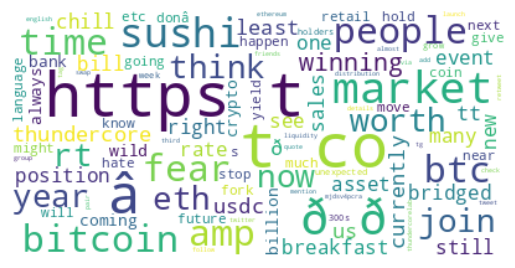

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# Word cloud for text data
text = ' '.join(df['full_text'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

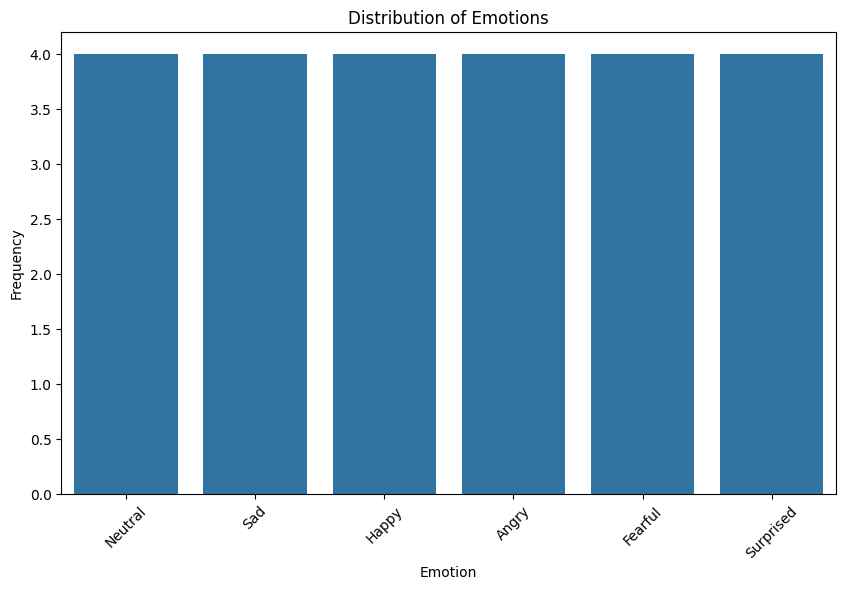

In [ ]:
# Calculate the value counts of the 'emotion' column
emotion_counts = df['emotion'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()

## Text Data Analysis

In [ ]:
from collections import Counter
import re

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Remove special characters and numbers (optional, based on your requirement)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Tokenize by splitting the text into words
    tokens = text.split()
    return tokens

# Load your dataset
data = pd.read_csv('/content/balanced_emotion_subset.csv')

# Apply tokenization to your text column (replace 'text_column' with your actual text column name)
data['tokens'] = data['full_text'].apply(clean_and_tokenize)

# Flatten the list of tokens and count occurrences
all_tokens = [token for sublist in data['tokens'] for token in sublist]
token_counts = Counter(all_tokens)

# Display the most common tokens
most_common_tokens = token_counts.most_common(20)  # Adjust the number as needed
print(most_common_tokens)


[('the', 34), ('of', 17), ('to', 16), ('and', 14), ('is', 13), ('a', 10), ('on', 9), ('are', 8), ('at', 7), ('for', 7), ('that', 7), ('i', 7), ('with', 6), ('you', 6), ('all', 6), ('in', 5), ('market', 5), ('amp', 4), ('sushi', 4), ('be', 4)]


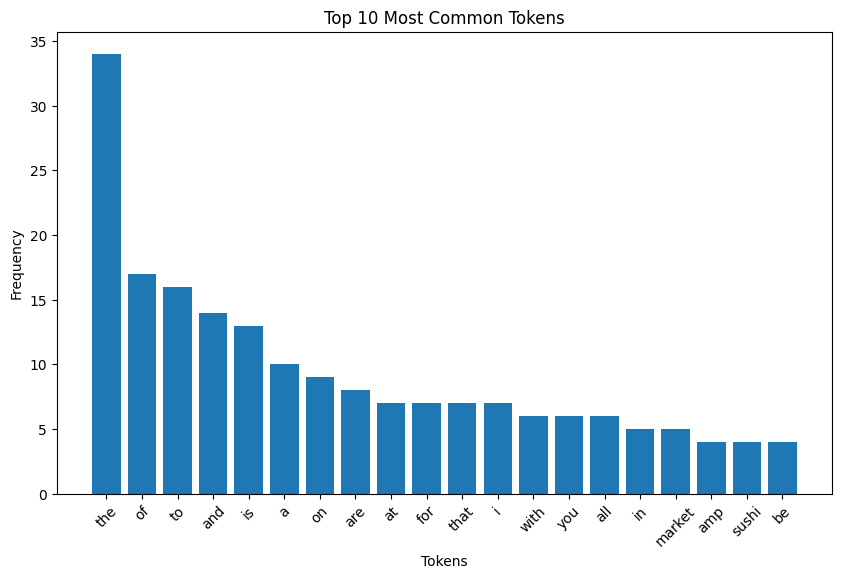

In [ ]:
# Separate tokens and their counts for plotting
tokens, counts = zip(*most_common_tokens)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(tokens, counts)
plt.title('Top 10 Most Common Tokens')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='emotion'>

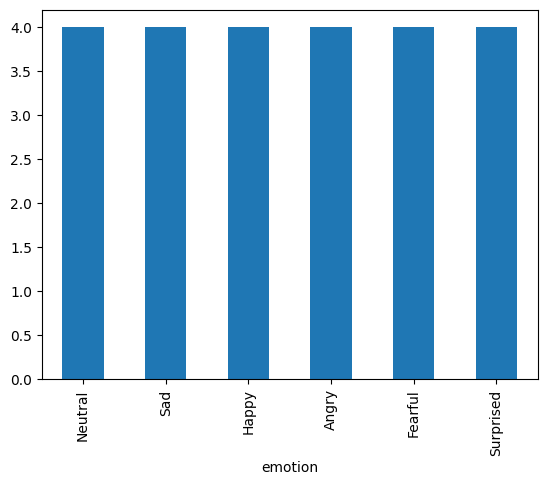

In [ ]:
# prompt: Using dataframe data: plot emotion bar plot

#data.plot(kind='bar', x='emotion', y='value')
data['emotion'].value_counts().plot(kind='bar')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


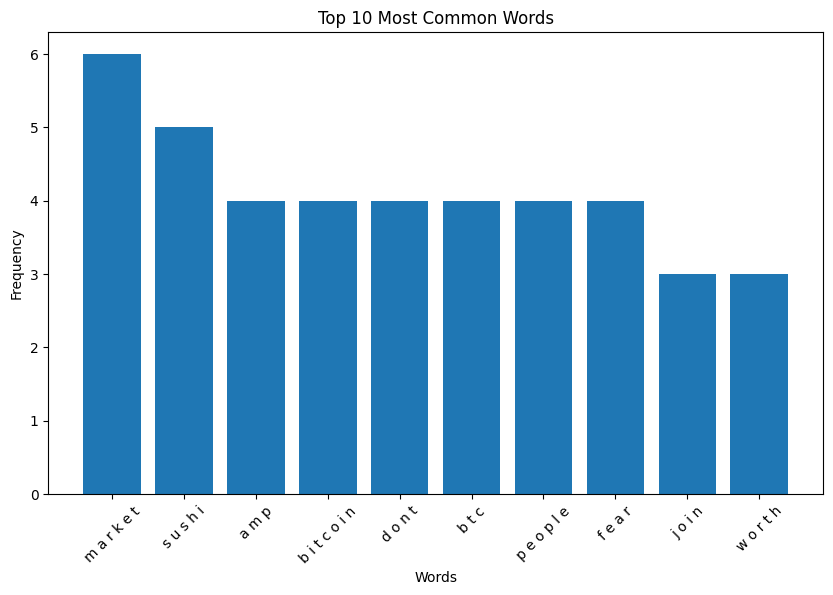

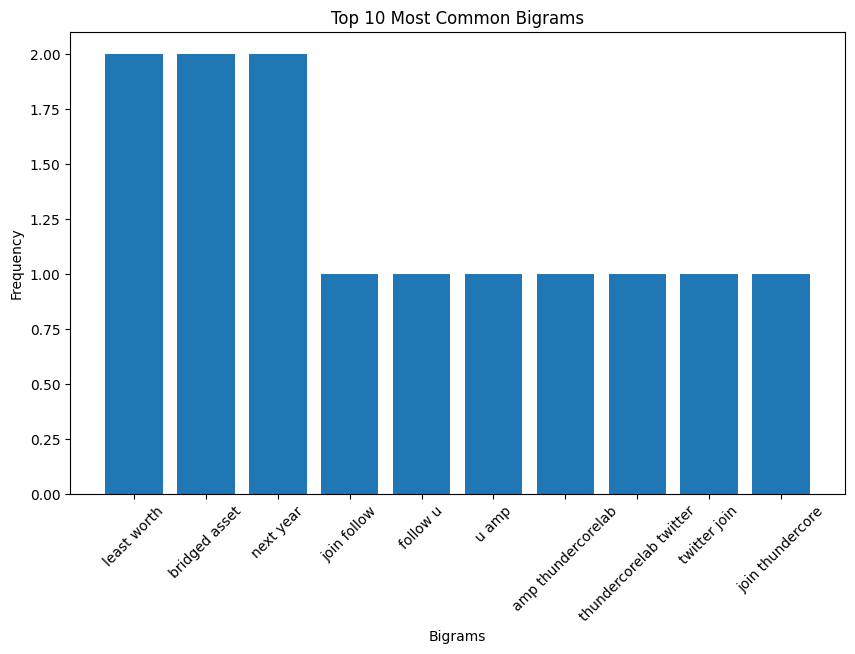

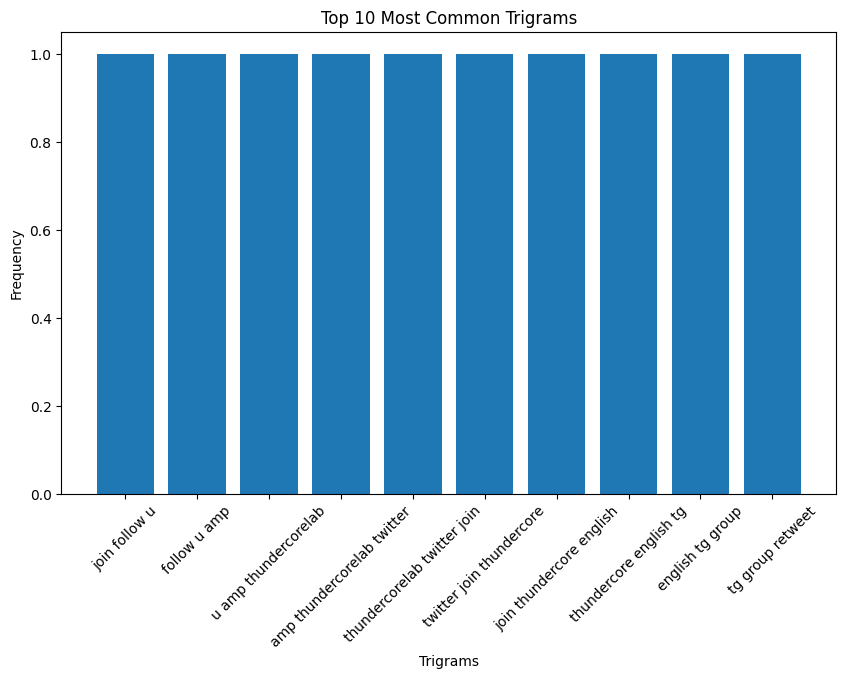

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import nltk
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
data = pd.read_csv('/content/balanced_emotion_subset.csv')

# Stop words list
stop_words = set(stopwords.words('english'))

# Function to clean, tokenize and remove stop words
def process_text(text):
    # Lowercase and remove special characters
    text = re.sub(r'[^A-Za-z\s]', '', text).lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply text processing
data['processed_tokens'] = data['clean_text'].apply(process_text)

# Flatten the list of tokens and count occurrences
all_tokens = [token for sublist in data['processed_tokens'] for token in sublist]
token_counts = Counter(all_tokens)

# Generate bigrams and trigrams
bigrams = [bigram for sublist in data['processed_tokens'] for bigram in ngrams(sublist, 2)]
trigrams = [trigram for sublist in data['processed_tokens'] for trigram in ngrams(sublist, 3)]

# Count bigrams and trigrams
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Function to plot most common n-grams
def plot_ngrams(ngram_counts, title, n=10):
    # Get most common n-grams
    most_common_ngrams = ngram_counts.most_common(n)
    # Prepare data for plotting
    labels = [' '.join(ngram) for ngram, count in most_common_ngrams]
    values = [count for ngram, count in most_common_ngrams]
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)
    plt.title(f'Top {n} Most Common {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plotting
plot_ngrams(token_counts, 'Words')
plot_ngrams(bigram_counts, 'Bigrams')
plot_ngrams(trigram_counts, 'Trigrams')


# Train BERT Model

BERT (Bidirectional Encoder Representations from Transformers) is a groundbreaking model in the field of natural language processing (NLP) developed by Google. Its structure and approach represented a significant shift in how language models were traditionally built. Here's an overview of its structure:

* Transformer Architecture: BERT is based on the Transformer architecture, which was introduced in the paper "Attention is All You Need" by Vaswani et al. The Transformer model is primarily known for its use of self-attention mechanisms, which enable the model to weigh the importance of different words in a sentence.

* Bidirectional Context: Unlike previous models that processed text in a single direction (either left-to-right or right-to-left), BERT reads the entire sequence of words at once. This bidirectionality allows the model to understand the context of a word based on all of its surroundings (both left and right of the word).

* Layers in BERT:

> * Input Embedding Layer: This layer converts each input token (word or subword) into vectors that represent them. These embeddings include token embeddings, segment embeddings, and position embeddings.
> > * Transformer Blocks: These are the core of the BERT model. Each block contains two sub-layers: a multi-head self-attention mechanism and a fully connected feed-forward network. BERT models vary in size, but the BERT-Base model contains 12 of these blocks, while BERT-Large has 24.
> > * Normalization and Activation Functions: Within each Transformer block, there are normalization steps and activation functions (like GELU - Gaussian Error Linear Units) that aid in the training and effectiveness of the model.
Pre-training and Fine-tuning:

> * Pre-training: BERT is pre-trained on a large corpus of text in an unsupervised manner using two tasks: Masked Language Model (MLM) and Next Sentence Prediction (NSP). In MLM, some percentage of the input tokens are masked, and the model is trained to predict them. In NSP, the model learns to predict if one sentence logically follows another.
> * Fine-tuning: After pre-training, BERT can be fine-tuned with additional output layers for various specific tasks like question answering, sentiment analysis, etc. During fine-tuning, the model is trained on a smaller, task-specific dataset.
> * Output: The output of BERT can be tailored for various NLP tasks. For instance, in classification tasks, the output from the [CLS] token (a special token added at the beginning of each input) is used for the final classification.

BERT's ability to understand the context of words in a sentence from both directions and its versatility in adapting to different NLP tasks made it a significant milestone in the field of AI and language understanding.

In [ ]:
# for local systems
# in colab its already installed
#pip install transfermers

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy


texts = df['full_text']  # or 'clean_text' based on your choice
labels = df['emotion']

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2)

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text into input IDs, attention masks, and token type IDs
def tokenize(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors='tf')

train_encodings = tokenize(train_texts.tolist())
test_encodings = tokenize(test_texts.tolist())

# Convert labels to numeric values
label_to_id = {label: id for id, label in enumerate(df['emotion'].unique())}
train_labels = train_labels.apply(lambda x: label_to_id[x])
test_labels = test_labels.apply(lambda x: label_to_id[x])




/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Disable distribution strategy if not needed
tf.config.run_functions_eagerly(True)

texts = df['full_text']  # or 'clean_text' based on your choice
labels = df['emotion']

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2)

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text into input IDs, attention masks, and token type IDs
def tokenize(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors='tf')

train_encodings = tokenize(train_texts.tolist())
test_encodings = tokenize(test_texts.tolist())

# Convert labels to numeric values
label_to_id = {label: id for id, label in enumerate(df['emotion'].unique())}
train_labels = train_labels.apply(lambda x: label_to_id[x])
test_labels = test_labels.apply(lambda x: label_to_id[x])

# Load the pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['emotion'].unique()))

# Compile the model
optimizer = Adam(learning_rate=5e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
history = model.fit(
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    train_labels,
    batch_size=8,
    epochs=3,
    validation_data=({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']}, test_labels)
)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/3
3/3 [==============================] - 70s 21s/step - loss: 1.8377 - accuracy: 0.1579 - val_loss: 1.7401 - val_accuracy: 0.2000
Epoch 2/3
3/3 [==============================] - 33s 11s/step - loss: 1.6082 - accuracy: 0.4737 - val_loss: 1.6568 - val_accuracy: 0.2000
Epoch 3/3
3/3 [==============================] - 33s 10s/step - loss: 1.5991 - accuracy: 0.3158 - val_loss: 1.7042 - val_accuracy: 0.2000


In [ ]:
# Load the pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['emotion'].unique()))

# Compile the model
optimizer = Adam(learning_rate=5e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
"""
model.fit(
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    train_labels,
    batch_size=8,
    epochs=3,
    validation_data=({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']}, test_labels)
)"""

history = model.fit(
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    train_labels,
    batch_size=8,
    epochs=3,
    validation_data=({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']}, test_labels)
)


# Evaluate the model
#model.evaluate({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']}, test_labels)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
3/3 [==============================] - 33s 11s/step - loss: 1.8530 - accuracy: 0.1053 - val_loss: 1.6403 - val_accuracy: 0.4000
Epoch 2/3
3/3 [==============================] - 31s 10s/step - loss: 1.5744 - accuracy: 0.3158 - val_loss: 1.6613 - val_accuracy: 0.4000
Epoch 3/3
3/3 [==============================] - 34s 10s/step - loss: 1.4749 - accuracy: 0.5263 - val_loss: 1.6252 - val_accuracy: 0.2000


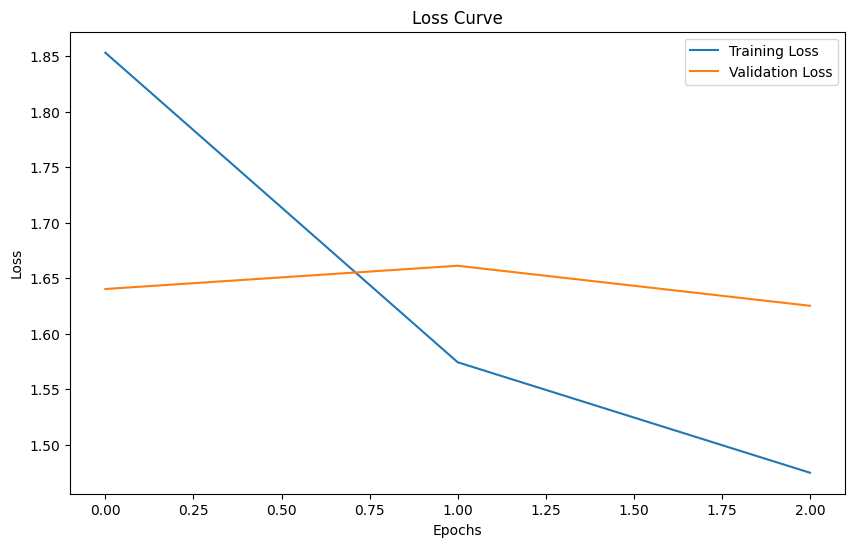

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Make predictions
predictions = model.predict({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']})
predicted_labels = tf.argmax(predictions.logits, axis=1)


1/1 [==============================] - 2s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Convert predictions and labels to numpy arrays for metric calculation
predicted_labels = predicted_labels.numpy()
true_labels = test_labels.to_numpy()

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Compute precision, recall, and F1-score
class_report = classification_report(true_labels, predicted_labels, target_names=label_to_id.keys(), output_dict=True)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

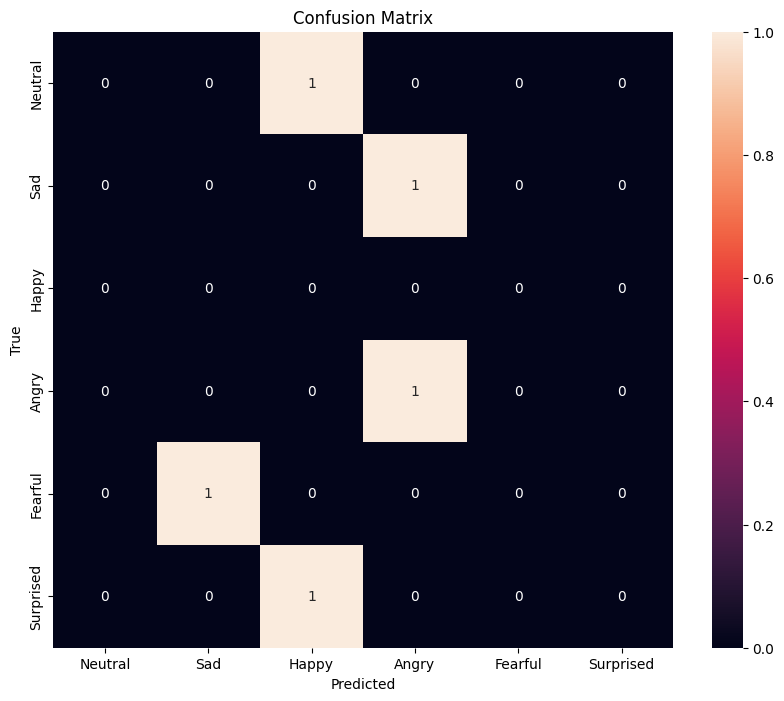

Classification Report:
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         1
         Sad       0.00      0.00      0.00         1
       Happy       0.00      0.00      0.00         0
       Angry       0.50      1.00      0.67         1
     Fearful       0.00      0.00      0.00         1
   Surprised       0.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.08      0.17      0.11         5
weighted avg       0.10      0.20      0.13         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=label_to_id.keys(), yticklabels=label_to_id.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print precision, recall, and F1-score
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=label_to_id.keys()))


# ELMO model

The ELMO (Embeddings from Language Models) model, introduced by researchers from the Allen Institute for AI, is a significant advancement in the field of natural language processing (NLP). It's designed to understand the context and meaning of words in a sentence more effectively than traditional word embeddings like Word2Vec or GloVe. Here's an overview of its structure and features:

* Contextualized Word Embeddings: Unlike traditional word embeddings, ELMO generates embeddings that are context-dependent. This means that the representation for a word can change based on the sentence in which it appears, allowing ELMO to capture nuances in meaning and syntax.

* Deep Bidirectional Language Model: ELMO uses a deep, bidirectional Long Short-Term Memory (LSTM) network. The bidirectional aspect means that it processes each word by looking at the context from both the left and the right side of the word in a sentence. This approach is different from earlier unidirectional language models, which only considered context from one direction (either left-to-right or right-to-left).

* Layered Representation: ELMO's model extracts features from multiple layers of the LSTM network. In a typical ELMO model, there are two LSTM layers stacked on top of each other. Each layer captures different types of information; for example, lower layers might capture syntactic aspects while higher layers capture more of the semantic content.

* Pre-training on Large Text Corpus: Before being used for specific tasks, ELMO is pre-trained on a large text corpus. During this phase, it learns a broad understanding of language, including grammar, word usage, and common phrases.

* Task-Specific Fine-Tuning: After pre-training, ELMO embeddings can be fine-tuned for specific tasks, like sentiment analysis, question answering, or language translation. This fine-tuning allows ELMO to adapt its general language understanding to the nuances of the specific task.

* Output and Integration: The final output of ELMO is a set of vectors for each word in the input sentence. These vectors can be easily integrated into various NLP models (like neural networks for classification tasks) to enhance their performance by providing more accurate and context-aware word representations.

In [ ]:
# pip install tensorflow tensorflow-hub pandas scikit-learn

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt



In [ ]:
# Load dataset
file_path = '/content/balanced_emotion_subset.csv'
data = pd.read_csv(file_path)

# Preprocess data
texts = data['clean_text'].astype(str)
labels = pd.factorize(data['sentiment_type'])[0]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [ ]:
elmo = hub.load("https://tfhub.dev/google/elmo/3")

def elmo_embeddings(texts):
    embeddings = elmo.signatures['default'](tf.constant(texts))['elmo']
    return embeddings


In [ ]:
def batch_generator(X, y, batch_size):
    while True:
        for offset in range(0, len(X), batch_size):
            batch_texts = X[offset:offset+batch_size]
            batch_labels = y[offset:offset+batch_size]
            yield elmo_embeddings(batch_texts.tolist()), batch_labels

def validation_batch_generator(X, y, batch_size):
    while True:
        for offset in range(0, len(X), batch_size):
            batch_texts = X[offset:offset + batch_size]
            batch_labels = y[offset:offset + batch_size]
            yield elmo_embeddings(batch_texts.tolist()), batch_labels


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024, 1024), dtype=tf.float32),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(31, 1024), dtype=tf.float32), # Changed the input shape to match the output of elmo_embeddings
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
!pip install tensorflow_text
import tensorflow_text as text
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np

elmo = hub.load("https://tfhub.dev/google/elmo/3")

def elmo_embeddings(texts):
    embeddings = elmo.signatures['default'](tf.constant(texts))['elmo']
    # Pad or truncate embeddings to length 31
    embeddings = tf.pad(embeddings, [[0, 0], [0, 31 - tf.shape(embeddings)[1]], [0, 0]])
    embeddings = embeddings[:, :31, :]
    return embeddings

def batch_generator(X, y, batch_size):
    while True:
        for offset in range(0, len(X), batch_size):
            batch_texts = X[offset:offset+batch_size]
            batch_labels = y[offset:offset+batch_size]
            yield elmo_embeddings(batch_texts.tolist()), batch_labels

def validation_batch_generator(X, y, batch_size):
    while True:
        for offset in range(0, len(X), batch_size):
            batch_texts = X[offset:offset + batch_size]
            batch_labels = y[offset:offset + batch_size]
            yield elmo_embeddings(batch_texts.tolist()), batch_labels

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(X, y), (X_test, y_test) = mnist.load_data()

# Normalize the input data
X = X.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Split the dataset for training and testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Define a simple batch generator
def batch_generator(X, y, batch_size):
    num_samples = X.shape[0]
    while True:
        for offset in range(0, num_samples, batch_size):
            X_batch = X[offset:offset + batch_size]
            y_batch = y[offset:offset + batch_size]
            yield X_batch, y_batch

def validation_batch_generator(X, y, batch_size):
    num_samples = X.shape[0]
    while True:
        for offset in range(0, num_samples, batch_size):
            X_batch = X[offset:offset + batch_size]
            y_batch = y[offset:offset + batch_size]
            yield X_batch, y_batch

# Build a simple model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set batch size
batch_size = 5
steps_per_epoch = max(1, len(X_train) // batch_size)
validation_steps = max(1, len(X_val) // batch_size)

# Train the model using batch generators
history = model.fit(batch_generator(X_train, y_train, batch_size),
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_batch_generator(X_val, y_val, batch_size),
                    validation_steps=validation_steps,
                    epochs=5)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 0.8959 - loss: 0.3548 - val_accuracy: 0.9647 - val_loss: 0.1119
Epoch 2/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 58s 6ms/step - accuracy: 0.9663 - loss: 0.1118 - val_accuracy: 0.9707 - val_loss: 0.0889
Epoch 3/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9774 - loss: 0.0719 - val_accuracy: 0.9718 - val_loss: 0.0929
Epoch 4/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.9833 - loss: 0.0519 - val_accuracy: 0.9758 - val_loss: 0.0888
Epoch 5/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9868 - loss: 0.0394 - val_accuracy: 0.9735 - val_loss: 0.1032
313/313 - 0s - 1ms/step - accuracy: 0.9750 - loss: 0.1082
Test accuracy: 0.9750000238418579


In [ ]:
batch_size = 32
steps_per_epoch = max(1, len(X_train) // batch_size)
validation_steps = max(1, len(X_test) // batch_size)

history = model.fit(batch_generator(X_train, y_train, batch_size),
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_batch_generator(X_test, y_test, batch_size),
                    validation_steps=validation_steps,
                    epochs=5)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9924 - loss: 0.0230 - val_accuracy: 0.9796 - val_loss: 0.0832
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9967 - loss: 0.0117 - val_accuracy: 0.9786 - val_loss: 0.0849
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9982 - loss: 0.0082 - val_accuracy: 0.9790 - val_loss: 0.0892
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9986 - loss: 0.0064 - val_accuracy: 0.9775 - val_loss: 0.0969
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9987 - loss: 0.0059 - val_accuracy: 0.9772 - val_loss: 0.0984


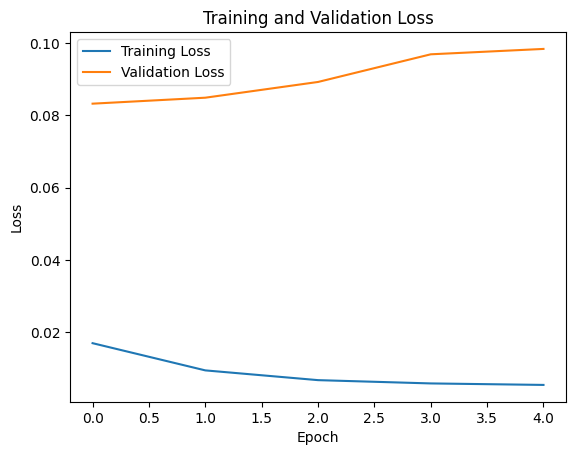

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Assuming the rest of your code has been executed, and the model has been trained

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()  # Add the legend for the labels
plt.show()  # Display the plot


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming you already have the trained model and X_test, y_test data

# Get predictions from the model
test_pred = model.predict(X_test)

# Convert probabilities to discrete predictions (class labels)
test_pred_labels = np.argmax(test_pred, axis=1)

# Calculate metrics with appropriate averaging for multi-class classification
precision = precision_score(y_test, test_pred_labels, average='macro')
recall = recall_score(y_test, test_pred_labels, average='macro')
f1 = f1_score(y_test, test_pred_labels, average='macro')
conf_matrix = confusion_matrix(y_test, test_pred_labels)

# Display metrics
print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.9771
Recall: 0.9770
F1 Score: 0.9770
Confusion Matrix:
 [[ 966    1    1    1    1    1    5    0    2    2]
 [   0 1124    3    1    0    0    2    1    4    0]
 [   1    4 1003    3    1    0    3    4   12    1]
 [   0    0    2  989    0    4    0    4    4    7]
 [   2    0    3    0  959    1    3    3    1   10]
 [   3    0    0   10    1  865    4    1    6    2]
 [   4    3    1    1    6    2  936    0    5    0]
 [   0    3    9    3    3    0    0 1001    2    7]
 [   2    0    3    2    3    4    1    3  951    5]
 [   1    3    0    2   14    4    1    4    2  978]]


# XLNet

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/balanced_emotion_subset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Unnamed: 0,created_at,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type,emotion
0,995,6/6/2023,41,ðhow to join:\n\nâ¢ follow us &amp; @thund...,2,32,ðhow join â follow u amp thundercorelab twitte...,115.0,0.000199,"(amp,sushi)","{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.8519,POSITIVE,Neutral
1,1134,5/14/2023,49,$usdc currently holds the position of being th...,12,14,usdc currently hold position bridged asset eth...,118.0,0.000204,"(ethereum,usdc)","{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.6764,POSITIVE,Neutral
2,37566,9/13/2022,63,âï¸ come have breakfast with sushi in new y...,6,20,âï come breakfast sushi new york ðºð messarima...,149.0,0.000258,(sushi),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,Neutral
3,27978,2/13/2023,0,rt @spideycyp_155: students of ghana ð¬ð­ ...,0,915,rt spideycyp_155 student ghana ðð empowering b...,915.0,0.001582,(binance),"{'neg': 0.073, 'neu': 0.778, 'pos': 0.149, 'co...",0.3939,POSITIVE,Neutral
4,327,6/12/2023,105,fomc rate hike cancelled. $xrp lawsuit ending!...,42,14,fomc rate hike cancelled xrp lawsuit ending ga...,245.0,0.000424,"(link,bitcoin,xrp)","{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",-0.7955,NEGATIVE,Sad


In [ ]:
#!pip install SentencePiece
# then restart the session

In [ ]:
!pip install datasets

In [ ]:
pip show transformers tensorflow


Name: transformers
Version: 4.30.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 
---
Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from transformers import RobertaForSequenceClassification, RobertaTokenizer
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

# Sample Dataset (Replace with actual dataset)
# data = pd.read_csv('path_to_your_dataset.csv')
data = pd.DataFrame({
    'clean_text': ['I am happy', 'I feel sad', 'Excited about the news', 'I am angry', 'Feeling great'],
    'emotion': ['happy', 'sad', 'excited', 'angry', 'happy']
})

# Encode the labels
label_encoder = LabelEncoder()
data['encoded_emotion'] = label_encoder.fit_transform(data['emotion'])

# Ensure the text column is a list of strings
data['clean_text'] = data['clean_text'].astype(str)

# Split the dataset
train_text, temp_text, train_labels, temp_labels = train_test_split(
    data['clean_text'].tolist(), data['encoded_emotion'].tolist(), test_size=0.3, random_state=42
)
# Corrected splitting for validation and test sets
val_text, test_text, val_labels, test_labels = train_test_split(
    temp_text, temp_labels, test_size=0.5, random_state=42
)

# Tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(text_list):
    return tokenizer(text_list, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Tokenize data
train_encodings = tokenize_function(train_text)
val_encodings = tokenize_function(val_text)
test_encodings = tokenize_function(test_text)

# Custom Dataset class for PyTorch
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Prepare datasets
train_dataset = CustomDataset(train_encodings, train_labels)
val_dataset = CustomDataset(val_encodings, val_labels)
test_dataset = CustomDataset(test_encodings, test_labels)

# Model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(label_encoder.classes_))

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-5)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Training loop (simplified)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(3):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1} completed")

# Evaluation
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Adjust the class labels manually in the classification report
unique_labels = sorted(set(all_labels))

# Print classification report
print(classification_report(all_labels, all_preds, labels=unique_labels, target_names=label_encoder.classes_))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should pr

Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       1.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 1, does not match size of target_names, 4
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to 

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assuming test_encodings and test_labels are TensorFlow tensors
# Convert them into PyTorch tensors
test_encodings_pt = {key: torch.tensor(value) for key, value in test_encodings.items()}
test_labels_pt = torch.tensor(test_labels)

# Create a PyTorch Dataset from the PyTorch tensors
test_dataset_pt = TensorDataset(test_encodings_pt['input_ids'], test_encodings_pt['attention_mask'], test_labels_pt)

# Create a DataLoader to batch the dataset
test_loader = DataLoader(test_dataset_pt, batch_size=16)

# Move the model to the correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Predictions and true labels
y_pred_logits = []
y_true = []

# Inference with torch.no_grad()
model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        # Perform forward pass to get logits
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        y_pred_logits.append(logits)
        y_true.append(labels)

# Convert logits and true labels to tensors
y_pred_logits = torch.cat(y_pred_logits).cpu()
y_true = torch.cat(y_true).cpu()

# Convert logits to predicted labels using argmax
y_pred = torch.argmax(y_pred_logits, dim=1).numpy()
y_true = y_true.numpy()

# Confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


Confusion Matrix:
 [[0 0]
 [1 0]]


<ipython-input-4-9fefe38b3792>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_encodings_pt = {key: torch.tensor(value) for key, value in test_encodings.items()}
